In [22]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

Processing...
Done!


In [3]:
len(train_dataset)

60000

In [5]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
train_dataset[0][1]

tensor(5)

displaying MNIST

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np

In [8]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

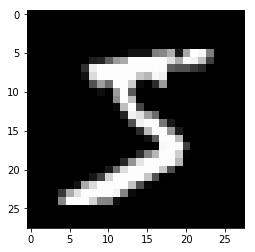

In [9]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28),cmap='gray')

##### Loading MNIST test dataset

In [10]:
test_dataset = dsets.MNIST(root='./data',
                          train=False,
                          transform=transforms.ToTensor())

In [11]:
len(test_dataset)

10000

In [14]:
batch_size = 100
n_iters=3000

In [15]:
num_epochs = n_iters/(len(train_dataset)/batch_size)
num_epochs= int(num_epochs)
num_epochs

5

In [16]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [17]:
import collections
isinstance(train_loader,collections.Iterable)

True

In [18]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [19]:
isinstance(test_loader,collections.Iterable)

True

##### building model

In [23]:
class LogisticRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.Linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.Linear(x)
        return out
    

##### instantiate Model Class

In [24]:
input_dim = 28*28
output_dim=10
model = LogisticRegressionModel(input_dim,output_dim)

##### instantiate loss class

In [25]:
criterion = nn.CrossEntropyLoss()

In [27]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


In [32]:
print(model.parameters())
print(len(list(model.parameters())))
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())


<generator object Module.parameters at 0x0000027393E28410>
2
torch.Size([10, 784])
torch.Size([10])


##### training 

In [42]:
iter = 0
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter += 1
        if iter % 250 == 0:
            correct = 0 
            total =0
            for images, labels in test_loader:
                images = Variable(images.view(-1,28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data,1)
                total  += labels.size(0)
                correct  += (predicted == labels).sum()
            accuracy = 100 * correct/total
            
            print('iterations:{}. Accuracy: {}'.format(iter,accuracy))

iterations:250. Accuracy: 84
iterations:500. Accuracy: 84
iterations:750. Accuracy: 84
iterations:1000. Accuracy: 85
iterations:1250. Accuracy: 85
iterations:1500. Accuracy: 85
iterations:1750. Accuracy: 85
iterations:2000. Accuracy: 85
iterations:2250. Accuracy: 85
iterations:2500. Accuracy: 86
iterations:2750. Accuracy: 86
iterations:3000. Accuracy: 86


##### model  training using gpu 

In [48]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)


test_dataset = dsets.MNIST(root='./data',
                          train=False,
                          transform=transforms.ToTensor())

batch_size = 100
n_iters=3000
num_epochs = n_iters/(len(train_dataset)/batch_size)
num_epochs= int(num_epochs)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

class LogisticRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.Linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.Linear(x)
        return out
    
input_dim = 28*28
output_dim=10
model = LogisticRegressionModel(input_dim,output_dim)

if torch.cuda.is_available():
    model.cuda()
    
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1,28*28).cuda())
            labels = Variable(labels.cuda())
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter += 1
        if iter % 250 == 0:
            correct = 0 
            total =0
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1,28*28).cuda())
                outputs = model(images)
                _, predicted = torch.max(outputs.data,1)
                total  += labels.size(0)
                if torch.cuda.is_available():
                    correct  += (predicted.cpu() == labels.cpu()).sum()
            accuracy = 100 * correct/total
            
            print('iterations:{}. Accuracy: {}'.format(iter,accuracy))

iterations:250. Accuracy: 45
iterations:500. Accuracy: 66
iterations:750. Accuracy: 73
iterations:1000. Accuracy: 75
iterations:1250. Accuracy: 77
iterations:1500. Accuracy: 78
iterations:1750. Accuracy: 80
iterations:2000. Accuracy: 80
iterations:2250. Accuracy: 81
iterations:2500. Accuracy: 82
iterations:2750. Accuracy: 82
iterations:3000. Accuracy: 82
